Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [1]:
import tensorflow as tf


**Gradient**

Możliwe jest wyliczenie gradientu dowolnego wyrażenia różniczkowalnego. Wykorzystujemy do tego metodę **tf.GradientTape()**


Funkcja **jednej zmiennej**:

In [2]:
x = tf.Variable(4.0)
with tf.GradientTape() as tape:
    f = x**3                     #definicja funkcji f(x)=x^3
    df_dx = tape.gradient(f, x)  #gradient 'f' ze względu na zmienną 'x'

df_dx.numpy()

48.0

Funkcja **dwóch zmiennych**:

In [3]:
x = tf.Variable(4.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    f = x**3+y**2                         #definicja funkcji f(x,y)=x^3+y^2
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x' i ze względu na zmienną 'y'

print(df_dx)
print(df_dy)

tf.Tensor(48.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


Przykład z **prezentacji**:

In [4]:
x = tf.Variable(3.0)
y = tf.Variable(2.0)

with tf.GradientTape() as tape:
    f = (x**2)*y                          #definicja funkcji f(x,y)=x^2*y
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x' i ze względu na zmienną 'y'

print(df_dx)
print(df_dy)

tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(9.0, shape=(), dtype=float32)


Trochę skomplikujemy:

In [5]:
x = tf.Variable([3.0,2.0])

with tf.GradientTape() as tape:
    f = (x**3)                  #definicja funkcji f(x)=x^3
    df_dx = tape.gradient(f,x)  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)

tf.Tensor([27. 12.], shape=(2,), dtype=float32)


I jeszcze trochę skomplikujemy:

In [6]:
x = tf.Variable([3.0,2.0])
y = tf.Variable([1.0,0.0])

with tf.GradientTape() as tape:
    f = (x**3)+y**2                       #definicja funkcji f(x)=x^3+y^2
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

tf.Tensor([27. 12.], shape=(2,), dtype=float32)
tf.Tensor([2. 0.], shape=(2,), dtype=float32)


Zmienne mogą być zastąpione przez tensory, wówczas konieczne jest **rejestrowanie wprost** operacji zastosowanych do tych sensorów. Służy do tego metoda **watch()**. W przypkadku zmiennych operacje są rejestrowane automatycznie.

In [7]:
x = tf.random.normal([2])
y = tf.random.normal([2])

print(x)
print(y)

with tf.GradientTape() as tape:
    tape.watch(x)
    tape.watch(y)
    f = (x**3)+y**2                       #definicja funkcji f(x)=x^3+y^2
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

tf.Tensor([ 1.1984582 -1.6615623], shape=(2,), dtype=float32)
tf.Tensor([2.4356475 1.8744793], shape=(2,), dtype=float32)
tf.Tensor([4.308906 8.282368], shape=(2,), dtype=float32)
tf.Tensor([4.871295  3.7489586], shape=(2,), dtype=float32)


In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
number_of_points = 1000
x_point = []
y_point = []

In [10]:
a = 0.22
b = 0.78

In [11]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

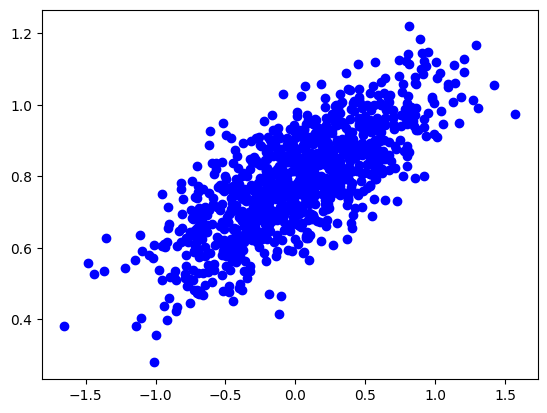

In [12]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [13]:
x_point

[-0.25151395334252363,
 0.21713182121150373,
 0.17930720860244634,
 -1.012084001988445,
 -0.02482265539488152,
 0.0712809521560205,
 -0.22176665088782713,
 0.6253235583768225,
 0.3445749461111451,
 -0.7689624522477865,
 0.353762896120879,
 -0.10708321673118085,
 -0.5332146028123604,
 1.206832121057858,
 -0.04280890364056125,
 -0.6595624544644997,
 0.6742530340307918,
 0.21938059837406818,
 -0.5495091920510121,
 0.4951458708192988,
 -0.7317353982024186,
 0.9759757447532634,
 0.3203937423569542,
 -0.2198005106166699,
 0.13181187166693722,
 -0.07931793641697459,
 -0.03749665859119721,
 -0.018373855702124783,
 0.6822457690213357,
 -0.8174952754863695,
 -0.7883500234032959,
 -1.482746884942927,
 0.396009619866644,
 -0.460295436499187,
 -0.20305150237726674,
 -0.04364322902243347,
 0.2992550520468762,
 0.06538386506963224,
 0.73888910183567,
 0.379121765987965,
 -0.31801416256678156,
 -0.6735410705440065,
 -0.6361913602894234,
 0.5882423252122615,
 0.5615668873467287,
 0.006647588347718239,


In [14]:
real_x = np.array(x_point)
real_y = np.array(y_point)

Definicja błędu:

In [15]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [16]:
x = tf.constant([1.0, 2.0, 3.0, 4.0])
tf.reduce_mean(x).numpy()

2.5

In [17]:
import random

TODO

In [33]:
Loss = []
epochs = 1000
learning_rate = 0.001

a = tf.Variable(random.random())
b = tf.Variable(random.random())

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db



Wykres zmian błędu:

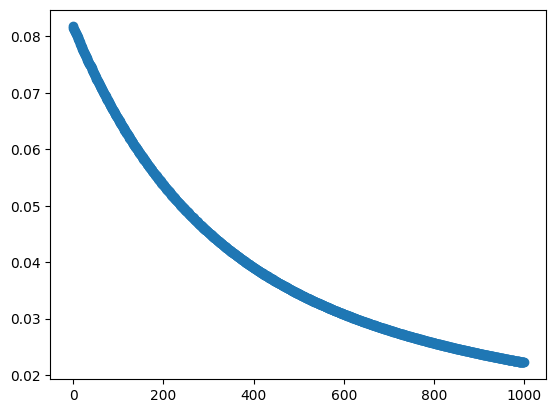

In [34]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [35]:
max = np.max(x_point)
min = np.min(x_point)

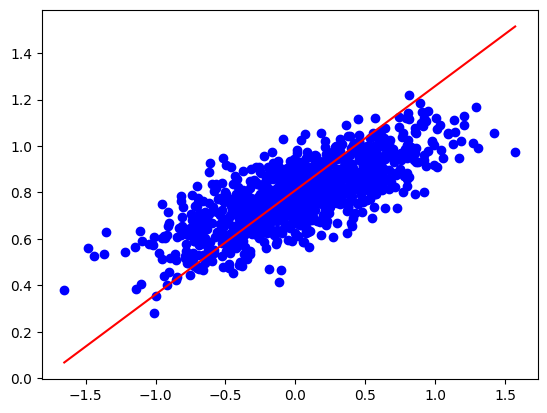

In [36]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()